# Pip installs

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.0 MB/s eta 0:00:00


In [2]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=d43e754015dd7d7c54ba2accb6a8a4baf651badbc42f285f80dd8a6b9286bba4
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [3]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.0 MB/s eta 0:00:00


In [5]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00


# Imports

In [6]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import transformers as ppb
import seaborn as sns
import matplotlib.patheffects as PathEffects
import sklearn

%matplotlib inline

from time import time
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import GridSearchCV
from transformers import BertModel, BertConfig
from sklearn import neighbors, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [7]:
# For doc2vecC we need to import files from personal google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Data Preprocessing, Test and Train

## Train dataframe

In [18]:
# df=pd.read_csv('./drive/Shareddrives/Liar_Project/Dataset/train.tsv',sep='\t', header=None)
df_valid = pd.read_csv('./valid.tsv',sep='\t', header=None)
df_test = pd.read_csv('./test.tsv',sep='\t', header=None)

In [20]:
df_valid.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

In [ ]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
df.isnull().sum()

id                      0
label                   0
statement               0
subjects                2
speaker                 2
speaker_job_title    2897
state_info           2208
party_affiliation       2
count_1                 2
count_2                 2
count_3                 2
count_4                 2
count_5                 2
context               102
dtype: int64

In [ ]:
# replaces all "null" or "NaN" values with an empty string
df.fillna("", inplace=True)
df.isnull().sum()

id                   0
label                0
statement            0
subjects             0
speaker              0
speaker_job_title    0
state_info           0
party_affiliation    0
count_1              0
count_2              0
count_3              0
count_4              0
count_5              0
context              0
dtype: int64

In [ ]:
df['label'].unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [ ]:
df_3_cat_imb = df.copy()
df_3_cat_bal = df.copy()

In [ ]:
df.shape

(10240, 14)

## Categories to codes

In [8]:
replace_label = {'false': 1, 'half-true': 0, 'mostly-true': 0, 'true': 0, 'barely-true': 0, 'pants-fire': 2}

In [23]:
df_test.label = [replace_label[item] for item in df_test.label]

In [25]:
df_valid.label.value_counts()

0    905
1    263
2    116
Name: label, dtype: int64

## Removing rows with more than 350 characters in their statement column

Run it for doc2vecC

In [ ]:
df['ZipLen'] = df['statement'].astype(str).map(len)
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context,ZipLen
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82
1,10540.json,0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141
2,324.json,0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release,78
4,9028.json,0,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54


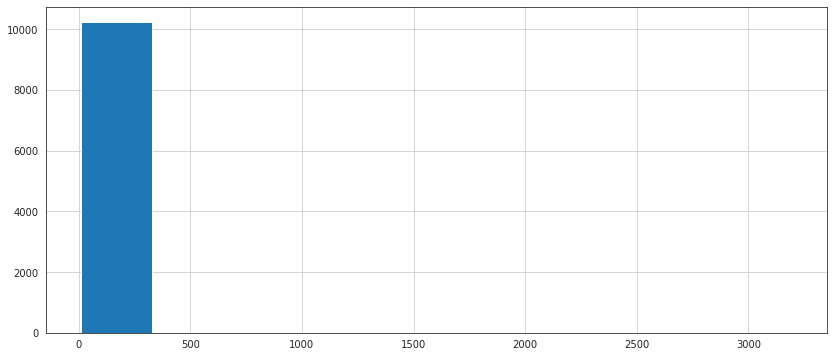

In [ ]:
len_sent = df['ZipLen']
len_sent.hist(figsize=[14,6]);

# There should be some rows with more than 500 characters in statement

In [ ]:
# Removing rows that contains more than 500 characters in statement

df = df[df.ZipLen < 350]

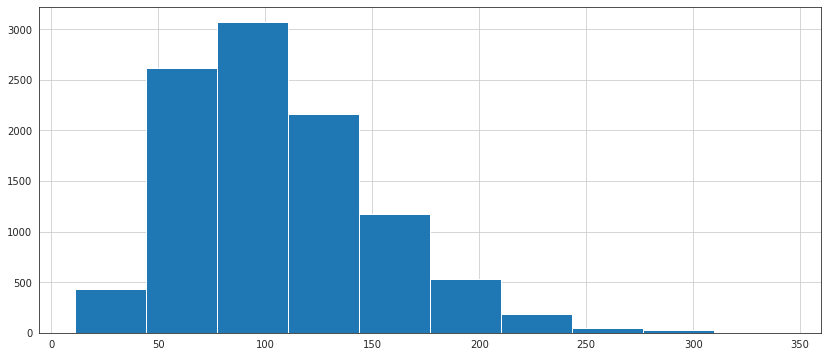

In [ ]:
# Again see the distribution of the statement's length

len_sent = df['ZipLen']
len_sent.hist(figsize=[14,6]);

In [ ]:
df.shape

(10232, 15)

## Test dataframe

In [ ]:
df_test = pd.read_csv('./drive/Shareddrives/Liar_Project/Dataset/test.tsv',sep='\t', header=None)

In [ ]:
df_test.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

In [ ]:
df_test.isnull().sum()

id                     0
label                  0
statement              0
subjects               0
speaker                0
speaker_job_title    325
state_info           262
party_affiliation      0
count_1                0
count_2                0
count_3                0
count_4                0
count_5                0
context               17
dtype: int64

In [ ]:
df_test.fillna("", inplace=True)
df_test.isnull().sum()

id                   0
label                0
statement            0
subjects             0
speaker              0
speaker_job_title    0
state_info           0
party_affiliation    0
count_1              0
count_2              0
count_3              0
count_4              0
count_5              0
context              0
dtype: int64

In [ ]:
df_test.head(2)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference


In [ ]:
df_2_cat_imb_test = df_test.copy()
df_2_cat_bal_test = df_test.copy()
df_3_cat_imb_test = df_test.copy()
df_3_cat_bal_test = df_test.copy()

## Changing the test labels to numbers

In [ ]:
df_test.label = [replace_label[item] for item in df_test.label]

In [ ]:
df_test.head(3)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,11972.json,0,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,1,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,1,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.


## Removing rows in test set that has statements more than 350 characters
Run it for doc2vecC

In [ ]:
df_test['ZipLen'] = df_test['statement'].astype(str).map(len)
df_test.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context,ZipLen
0,11972.json,0,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,68
1,11685.json,1,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,63
2,11096.json,1,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,51
3,5209.json,0,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,85
4,9524.json,2,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,,Wisconsin,democrat,5,7,2,2,7,a web video,127


In [ ]:
df_test = df_test[df_test.ZipLen < 350]

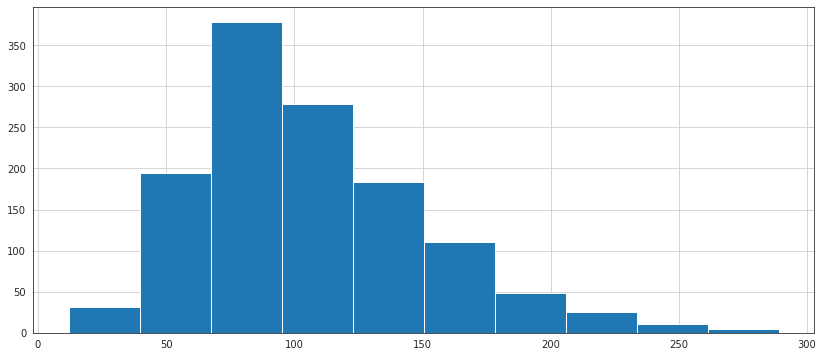

In [ ]:
len_sent = df_test['ZipLen']
len_sent.hist(figsize=[14,6]);

In [ ]:
df_test.shape

(1265, 15)

## Removing non-ascii characters in test and train dataframes

In [ ]:
df.shape

(10232, 15)

In [ ]:
df = df[df['statement'].map(lambda x: x.isascii())]

In [ ]:
df.shape

(10226, 15)

In [ ]:
df_test.shape

(1265, 15)

In [ ]:
df_test = df_test[df_test['statement'].map(lambda x: x.isascii())]

In [ ]:
df_test.shape

(1265, 15)

# Shell cells for doc2vecC

## Train embeddings

In [ ]:
# Creating "statements" folder in the drive. Read from statement column and create text files in the folder.

df.reset_index()
for i in df['statement'].index:
  with open('./drive/Shareddrives/Liar_Project/bash/statements/sentences/'+ '{0:05}'.format(i) + '.txt', 'w') as f:
    f.write(df['statement'][i])

In [ ]:
df.shape

(10226, 15)

In [ ]:
%%shell
cd drive/Shareddrives/Liar_Project/bash/statements/sentences/
ls | wc -l

10226


In [ ]:
# Now that we have all the input data we run go.sh script to create vectors
# The output would be a txt file with 256 features

%%shell
cd drive/Shareddrives/Liar_Project/bash/
bash go.sh

rm: cannot remove 'temp': No such file or directory
rm: cannot remove 'sentences/norm.txt': No such file or directory
doc2vecc.c: In function ‘ReadVocab’:
doc2vecc.c:322:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
  322 |     fscanf(fin, "%lld%c", &vocab[a].cn, &c);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Starting training using file ./statements/sentences/norm.txt
Vocab size: 2076
Words in train file: 192757
Alpha: 0.000218  Progress: 99.82%  Words/thread/sec: 111.79k  finish embedding training
writing sentence vector ...

real	0m26.338s
user	0m35.487s
sys	0m0.544s


In [ ]:
# %%shell

# head -10 ./statements/sentences/norm.txt

In [ ]:
# %%shell

# mv ./wordvectors.txt drive/MyDrive/Liar_project/

In [ ]:
# Creating features without using np and then converting to np array

# with open("./drive/Shareddrives/Liar_Project/", "r") as file:
#     features = [[x for x in line.split()] for line in file]

# features = np.array(features)

## Test embeddings

In [ ]:
df.reset_index()
for i in df_test['statement'].index:
  with open('./drive/Shareddrives/Liar_Project/bash/statements/test_sentences/'+ '{0:04}'.format(i) + '.txt', 'w') as f:
    f.write(df_test['statement'][i])

In [ ]:
df_test.shape

(1265, 15)

In [ ]:
%%shell
cd drive/Shareddrives/Liar_Project/bash/statements/test_sentences/
ls | wc -l

1266


In [ ]:
%%shell

cd drive/Shareddrives/Liar_Project/bash/
bash go_test.sh

rm: cannot remove 'test_sentences/norm.txt': No such file or directory
doc2vecc.c: In function ‘ReadVocab’:
doc2vecc.c:322:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
  322 |     fscanf(fin, "%lld%c", &vocab[a].cn, &c);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Starting training using file ./statements/test_sentences/norm.txt
Vocab size: 374
Words in train file: 19081
finish embedding training
writing sentence vector ...

real	0m2.548s
user	0m3.465s
sys	0m0.234s


# Feature vectors from doc2vecC 

In [ ]:
features_dvc = np.loadtxt("./drive/Shareddrives/Liar_Project/bash/docvectors.txt")
features_dvc.shape

(10228, 256)

In [ ]:
features_dvc = features_dvc[:10226,:]
features_dvc.shape

(10226, 256)

In [ ]:
# Create "features" numpy array from vectors 
features_dvc_test = np.loadtxt("./drive/Shareddrives/Liar_Project/bash/docvectors_test.txt")
features_dvc_test = features_dvc_test[0:1265,:]
features_dvc_test.shape

(1265, 256)

# X_train, x_test split

In [ ]:
X_train = features_dvc
y_train = df.label

X_test = features_dvc_test
y_test = df_test.label

X_train.shape, y_train.shape, X_test.shape, y_test.shape

AttributeError: ignored

# Imbalanced

## Modeling: SVM

In [ ]:
# SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', degree=3,
              decision_function_shape='ovo',
              probability=True)
clf.fit(X_train, y_train)

# predict on training examples
y_pred_svm = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

0.7304347826086957


In [ ]:
y_pred_svm_train = clf.predict(X_train)
print(accuracy_score(y_train, y_pred_svm_train))

0.7233522393897908


In [ ]:
f1_score(y_test, y_pred_svm, average= 'weighted')

0.6166484596897531

In [ ]:
precision_score(y_test, y_pred_svm, average= 'weighted')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5335349716446124

In [ ]:
recall_score(y_test, y_pred_svm, average= 'weighted')

0.7304347826086957

In [ ]:
y_score = np.array([y for y in clf.predict_proba(X_test)])
pred_SVM = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_SVM, multi_class="ovo")

# roc_auc_score(y_test, clf.decision_function(X_test), multi_class="ovo")

0.5253884995405426

### ROC curves

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.84


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.53


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.53


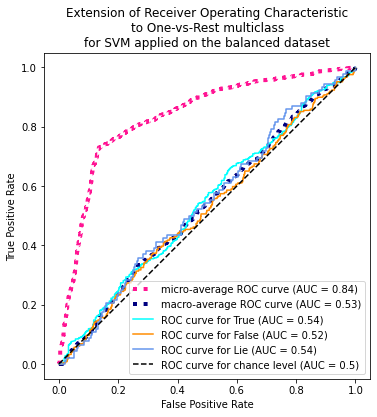

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Imbalanced-SVM-ROC-all')
plt.show()

## Modeling: KNN

In [ ]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_train, y_train)

y_pred_knn = knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test == y_pred_knn)/y_test.shape[0])*100))

Accuracy=67.27272727272727%


In [ ]:
y_pred_knn_train = knn_best.predict(X_train)
print("Accuracy={}%".format((sum(y_train == y_pred_knn_train)/y_train.shape[0])*100))

Accuracy=73.99765304126736%


In [ ]:
f1_score(y_test, y_pred_knn, average= 'weighted')

0.608367081089926

In [ ]:
precision_score(y_test, y_pred_knn, average= 'weighted')

0.5728985790280332

In [ ]:
recall_score(y_test, y_pred_knn, average= 'weighted')

0.6703557312252965

In [ ]:
y_score = np.array([y for y in knn_best.predict_proba(X_test)])
pred_knn = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_knn, multi_class="ovo")

0.5229504070929555

### ROC curves

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.78


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.52


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.52


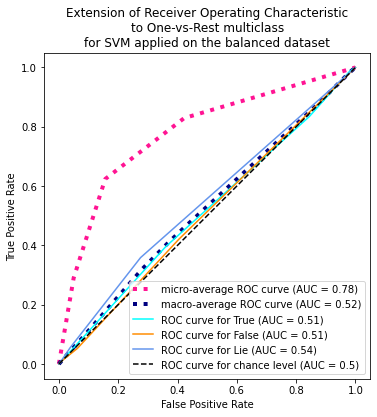

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Imbalanced-SVM-ROC-all')
plt.show()

## TSNE & PCA

### TSNE

In [ ]:
labels = df.label.values
labels.shape, features_dvc.shape

((10226,), (10226, 256))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.005s...
[t-SNE] Computed neighbors for 10226 samples in 4.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.233278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.321243
[t-SNE] KL 

In [ ]:
z.shape, labels.shape, X_train.shape

((10226, 2), (10226,), (10226, 256))

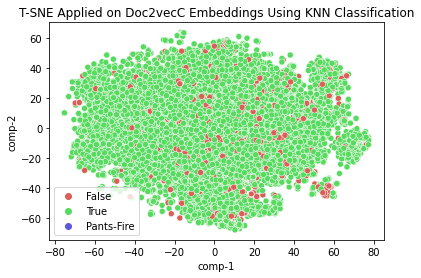

In [ ]:
df1 = pd.DataFrame()
labels = pd.Series(y_pred_knn_train).map({2: 'True', 1: 'False', 0: 'Pants-fire'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                hue_order = ['False', 'True', 'Pants-Fire'],
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE Applied on Doc2vecC Embeddings Using KNN Classification");
plt.savefig('doc2vecC-tsne-pred-knn.png')

### PCA

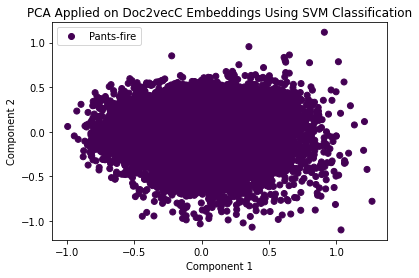

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(X_train)
Xt = pca.transform(X_train)
labels = y_pred_svm_train

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
# plt.rc('image', cmap='jet_r')
plt.legend(handles=plot.legend_elements()[0], labels=['Pants-fire','False', 'True'])

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA Applied on Doc2vecC Embeddings Using SVM Classification")
plt.savefig('doc2vecC-PCA-pred-svm')
plt.show();

## TSNE & PCA predicted

### TSNE

In [ ]:
labels = y_pred_knn_train
labels.shape,X_train.shape

((10226,), (10226, 256))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.004s...
[t-SNE] Computed neighbors for 10226 samples in 2.889s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.233278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.321243
[t-SNE] KL 

In [ ]:
z.shape, labels.shape, X_train.shape

((10226, 2), (10226,), (10226, 256))

In [ ]:
labels

array([2, 2, 2, ..., 2, 2, 2])

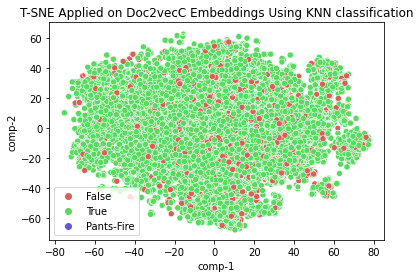

In [ ]:
df1 = pd.DataFrame()
labels = y_pred_knn_train
labels = pd.Series(labels).map({0: 'Pants-fire', 1: 'False', 2: 'True'})
df1["y"] = labels
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                hue_order = ['False', 'True', 'Pants-Fire'],
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE Applied on Doc2vecC Embeddings Using KNN classification");
plt.savefig('doc2vecC-tsne-pred-knn.png')

### PCA

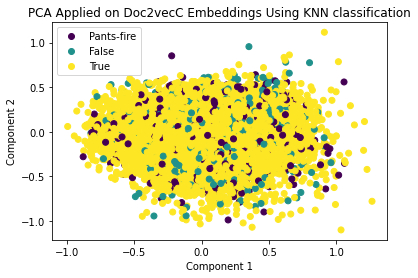

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(X_train)
Xt = pca.transform(X_train)
labels = y_pred_knn_train

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
# plt.rc('image', cmap='jet_r')
plt.legend(handles=plot.legend_elements()[0], labels=['Pants-fire', 'False','True'])

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA Applied on Doc2vecC Embeddings Using KNN classification")
plt.savefig('doc2vecC-PCA-pred-knn.png')
plt.show();

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(features_dvc)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.006s...
[t-SNE] Computed neighbors for 10226 samples in 5.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.233278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.321243
[t-SNE] KL 

In [ ]:
z.shape, labels.shape, features_dvc.shape

((10226, 2), (10226,), (10226, 256))

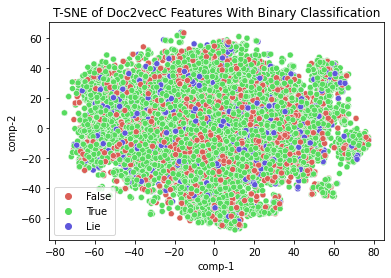

In [ ]:
df1 = pd.DataFrame()
labels = df['label'].map({0: 'True', 1: 'False', 2: 'Lie'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE of Doc2vecC Features With Binary Classification");
plt.savefig('doc2vecC-tsne-imb.png')

### PCA

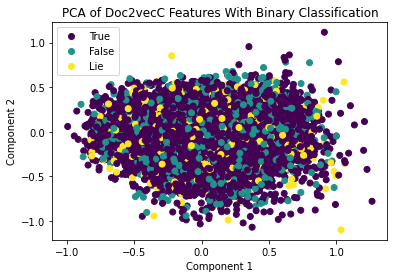

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(features_dvc)
Xt = pca.transform(features_dvc)
labels = df['label']

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
# plt.rc('image', cmap='jet_r')
plt.legend(handles=plot.legend_elements()[0], labels=['True', 'False', 'Lie'])

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA of Doc2vecC Features With Binary Classification")
plt.savefig('doc2vecC-PCA-imb')
plt.show();

# Balanced dataset


## Data Preparation

In [ ]:
# Replace train dataframe lables

replace_label = {'false': 1, 'half-true': 2, 'mostly-true': 2, 'true': 2, 'barely-true': 2, 'pants-fire': 0}
df_3_cat_bal.label = [replace_label[item] for item in df_3_cat_bal.label]
df_3_cat_bal.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,2,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
# Replace test dataframe lables
df_3_cat_bal_test.label = [replace_label[item] for item in df_3_cat_bal_test.label]
df_3_cat_bal_test.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,11972.json,2,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,1,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,1,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,2,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,0,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,,Wisconsin,democrat,5,7,2,2,7,a web video


In [ ]:
df_3_cat_bal['ZipLen'] = df_3_cat_bal['statement'].astype(str).map(len)
df_3_cat_bal_test['ZipLen'] = df_3_cat_bal_test['statement'].astype(str).map(len)
df_3_cat_bal = df_3_cat_bal[df_3_cat_bal.ZipLen < 350]
df_3_cat_bal_test = df_3_cat_bal_test[df_3_cat_bal_test.ZipLen < 350]
df_3_cat_bal = df_3_cat_bal[df_3_cat_bal['statement'].map(lambda x: x.isascii())]
df_3_cat_bal_test = df_3_cat_bal_test[df_3_cat_bal_test['statement'].map(lambda x: x.isascii())]

In [ ]:
X_train = features_dvc
y_train = df_3_cat_bal.label

X_test = features_dvc_test
y_tesy = df_3_cat_bal_test.label
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10226, 256), (10226,), (1265, 256), (1265,))

In [ ]:
# Random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='not minority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
print(Counter(y_under))

Counter({2: 7397, 1: 1992, 0: 837})
Counter({0: 837, 1: 837, 2: 837})


In [ ]:
# Random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='not minority')
# fit and apply the transform
X_t_under, y_t_under = undersample.fit_resample(X_test, y_test)
# summarize class distribution
print(Counter(y_test))
print(Counter(y_t_under))

Counter({0: 924, 1: 249, 2: 92})
Counter({0: 92, 1: 92, 2: 92})


In [ ]:
df_bal_multi = pd.DataFrame(X_under, y_under)
df_bal_multi.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
label,,,,,,,,,,,,,,,,,,,,,
0,-0.024018,-0.022997,0.136486,-0.024191,0.046789,-0.048361,-0.005988,-0.017922,0.043120,-0.038256,...,-0.009986,-0.113127,0.053465,0.072783,-0.001423,0.033425,-0.135801,-0.079172,-0.008492,0.024116
0,-0.057329,-0.002429,0.153201,-0.022929,0.067376,-0.074762,-0.035007,-0.050154,0.091418,-0.002786,...,-0.016019,-0.095200,0.047029,0.071370,-0.098782,0.052071,-0.099803,-0.106896,-0.017437,0.090183
0,-0.073325,-0.004827,0.115399,0.057693,0.043490,-0.065489,0.004747,-0.061818,-0.009690,-0.009338,...,0.022748,-0.034271,0.069991,0.080801,-0.054295,-0.030828,-0.045634,-0.046037,-0.074056,0.181682
0,-0.021298,-0.135361,0.071654,-0.148098,-0.025441,0.028972,0.024000,-0.030704,0.112287,-0.070195,...,-0.028974,0.027853,0.058153,0.060837,-0.052965,0.188556,-0.070328,0.021395,-0.116349,0.069659
0,-0.136374,-0.024541,0.101866,-0.051163,0.051716,-0.008699,-0.055952,-0.149211,-0.005616,-0.112470,...,0.002318,-0.055664,-0.044592,0.124753,-0.046418,0.007700,-0.089225,-0.047111,-0.094430,0.036201


## Modeling: SVM

In [ ]:
# SVM
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf_bal = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', degree = 3,
                                          decision_function_shape='ovo',
                                          probability=True))
clf_bal.fit(X_under, y_under)


# predict on training examples
y_pred_under = clf_bal.predict(X_test)
print(accuracy_score(y_test, y_pred_under))

0.3027667984189723


In [ ]:
y_pred_train_under = clf_bal.predict(X_under)
print(accuracy_score(y_under, y_pred_train_under))

0.6810035842293907


In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_under, y_pred_train_under)

0.521505376344086

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_under, average= 'weighted')

0.3317639292978698

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_under, average='weighted')

0.5640090000166088

In [ ]:
recall_score(y_test, y_pred_under, average= 'weighted')

0.3027667984189723

In [ ]:
y_score = np.array([y for y in clf_bal.predict_proba(X_test)])
pred = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred, multi_class="ovr", average= 'weighted')

0.4538318284556471

### ROC curves

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.47


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.46


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.46


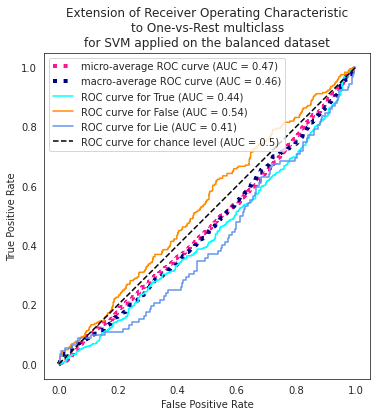

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Balanced-SVM-ROC-all')
plt.show()

## Modeling: KNN

In [ ]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_under, y_under)

y_pred_knn = knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test == y_pred_knn)/y_test.shape[0])*100))

Accuracy=44.66403162055336%


In [ ]:
y_pred_knn_train = knn_best.predict(X_under)
print("Accuracy={}%".format((sum(y_under == y_pred_knn_train)/y_under.shape[0])*100))

Accuracy=55.475906013540424%


In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_under, y_pred_knn_train)

0.3321385902031063

In [ ]:
f1_score(y_test, y_pred_knn, average= 'weighted')

0.48377883369253355

In [ ]:
precision_score(y_test, y_pred_knn, average= 'weighted')

0.5331026549768059

In [ ]:
recall_score(y_test, y_pred_knn, average= 'weighted')

0.44664031620553357

In [ ]:
y_score = np.array([y for y in knn_best.predict_proba(X_test)])
pred_knn = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_knn, multi_class="ovo")

0.44635414737562457

### ROC curves

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_under)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.57


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.44


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.44


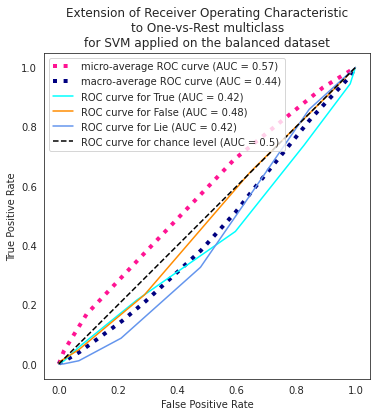

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Imbalanced-SVM-ROC-all')
plt.show()

## TSNE & PCA

### TSNE

In [ ]:
labels = y_under
labels.shape, X_under.shape

((2511,), (2511, 256))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_under)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2511 samples in 0.001s...
[t-SNE] Computed neighbors for 2511 samples in 0.347s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2511
[t-SNE] Computed conditional probabilities for sample 2000 / 2511
[t-SNE] Computed conditional probabilities for sample 2511 / 2511
[t-SNE] Mean sigma: 0.264607
[t-SNE] KL divergence after 50 iterations with early exaggeration: 78.888779
[t-SNE] KL divergence after 1000 iterations: 2.231544


In [ ]:
z.shape, labels.shape, X_under.shape

((2511, 2), (2511,), (2511, 256))

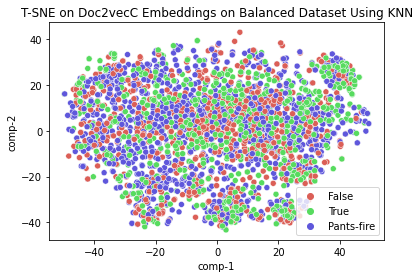

In [ ]:
df1 = pd.DataFrame()
labels = pd.Series(y_pred_knn_train).map({2: 'True', 1: 'False', 0: 'Pants-fire'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                hue_order = ['False', 'True', 'Pants-fire'],
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE on Doc2vecC Embeddings on Balanced Dataset Using KNN");
plt.savefig('doc2vecC-tsne-bal-pred-knn.png')

### PCA

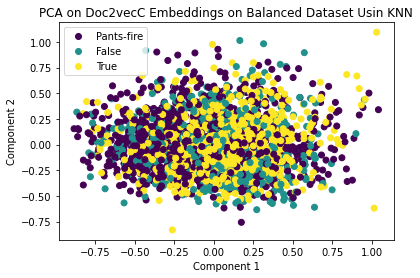

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(X_under)
Xt = pca.transform(X_under)
labels = y_pred_knn_train

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
# plt.rc('image', cmap='jet_r')
plt.legend(handles=plot.legend_elements()[0], labels=['Pants-fire', 'False', 'True'])

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA on Doc2vecC Embeddings on Balanced Dataset Usin KNN")
plt.savefig('doc2vecC-PCA-bal-pred-knn.png')
plt.show();


# 3D t-SNE and PCA

In [ ]:
type(X_under)

numpy.ndarray

<Figure size 480x480 with 0 Axes>

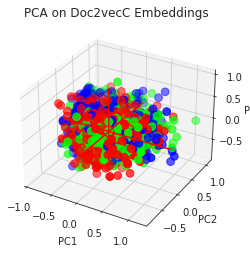

<Figure size 432x288 with 0 Axes>

In [ ]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
 
# Get the iris dataset
sns.set_style("white")


# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Keep the 'species' column appart + make it numeric for coloring
my_color = pd.DataFrame(y_pred_train_under)
df = pd.DataFrame(X_under)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap='brg', s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Doc2vecC Embeddings")
plt.show()
plt.savefig('doc2vecc-pca-3d-svm.png')

In [ ]:
pca = PCA(n_components=3)
 
pca.fit(X_under)
 
pca_original = pca.transform(X_under)

In [ ]:
Xax = pca_original[:,0]
Yax = pca_original[:,1]
Zax = pca_original[:,2]

In [ ]:
cdict = {1:'teal',2:'purple', 0:'yellow'}
label = {2:'Pants-fire',1:'False', 0:'True'}

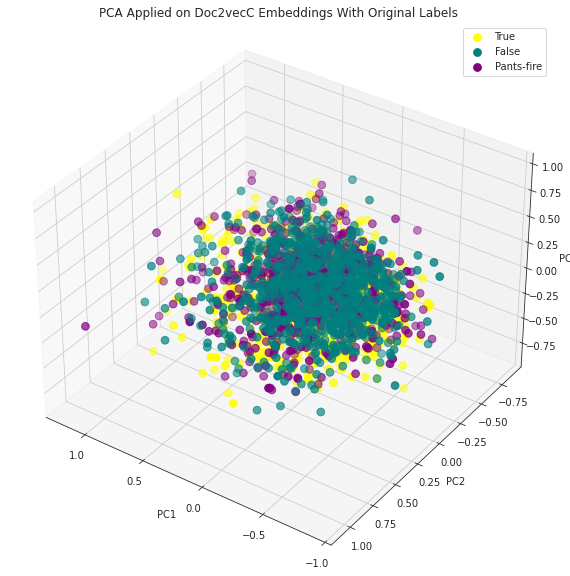

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y_under):
  ix=np.where(y_under==l)
  ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=60,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=10)
ax.set_ylabel("PC2", 
              fontsize=10)
ax.set_zlabel("PC3", 
              fontsize=10)
 
ax.view_init(35, 125)
ax.legend()
plt.title("PCA Applied on Doc2vecC Embeddings With Original Labels")
plt.savefig('doc2vecc-pca-3d.png')
plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
scaled = scaler.fit(X_under)
data = scaler.transform(X_under)

pca = PCA(n_components=3)
components = pca.fit_transform(data)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    color=y_under.map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='PCA Applied on Doc2vecC Embeddings with Original Labels',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()
fig.write_image(file='./doc2vecc-pca-3d.png', format='png')

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px


df = pd.DataFrame(X_under)
features = pd.DataFrame(y_under)

tsne = TSNE(n_components=3)
projections = tsne.fit_transform(X_under,)


In [ ]:
fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=y_under.map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='t-SNE Applied on Doc2vecC Embeddings with Original Labels'
    )
fig.update_traces(marker_size=8)
fig.show()
fig.write_image(file='./doc2vecc-tsne-3d.png', format='png')

In [ ]:
features.shape

(2511, 1)

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results2 = tsne.fit_transform(X_under)

In [ ]:
tsne_dataset2 = pd.DataFrame(data = tsne_results2, columns = ['component3', 'component4', 'component5'] )
tsne_dataset2.head()

In [ ]:
tsne_component3 = tsne_dataset2['component3']
tsne_component4 = tsne_dataset2['component4']
tsne_component5 = tsne_dataset2['component5']

In [ ]:
# Visualizing the 3D t-SNE.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D t-SNE')
ax.scatter(
    xs=tsne_component3, 
    ys=tsne_component4, 
    zs=tsne_component5, 
    #c = x_kmeans
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

# PCA and t-SNE for SVM Balanced

In [ ]:
y_pred_train_under

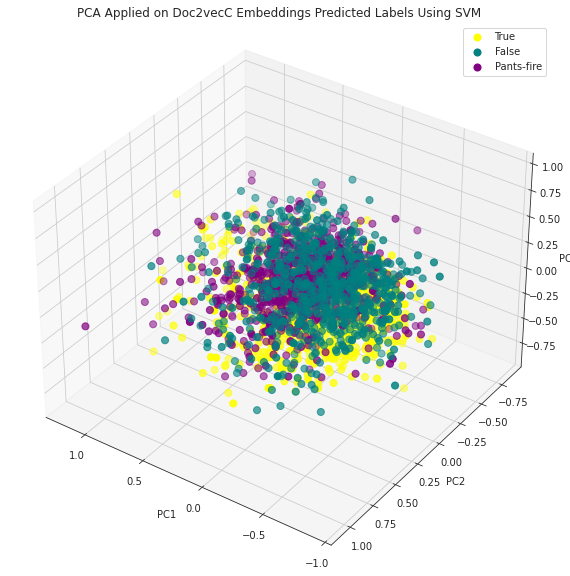

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y_pred_train_under):
  ix=np.where(y_pred_train_under==l)
  ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=50,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=10)
ax.set_ylabel("PC2", 
              fontsize=10)
ax.set_zlabel("PC3", 
              fontsize=10)
 
ax.view_init(35, 125)
ax.legend()
plt.title("PCA Applied on Doc2vecC Embeddings Predicted Labels Using SVM")
plt.savefig('doc2vecc-pca-3d-svm.png')
plt.show()

In [ ]:
fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=pd.Series(y_pred_train_under).map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='t-SNE Applied on Doc2vecC Embeddings Predicted Labels Using SVM'
    )
fig.update_traces(marker_size=8)
fig.show()
fig.write_image(file='./doc2vecc-tsne-3d-svm.png', format='png')

In [ ]:
y_pred_knn_train

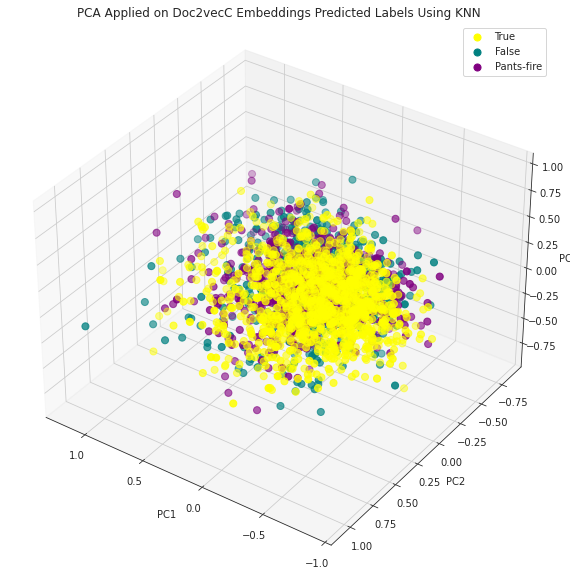

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y_pred_knn_train):
  ix=np.where(y_pred_knn_train==l)
  ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=50,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=10)
ax.set_ylabel("PC2", 
              fontsize=10)
ax.set_zlabel("PC3", 
              fontsize=10)
 
ax.view_init(35, 125)
ax.legend()
plt.title("PCA Applied on Doc2vecC Embeddings Predicted Labels Using KNN")
plt.savefig('doc2vecc-pca-3d-knn.png')
plt.show()

In [ ]:
fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=pd.Series(y_pred_knn_train).map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='t-SNE Applied on Doc2vecC Embeddings Predicted Labels Using KNN'
    )
fig.update_traces(marker_size=8)
fig.show()
fig.write_image(file='./doc2vecc-tsne-3d-knn.png', format='png')